In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

### Blurriness metrics & down-sampling images
Based on _Fast, high-precision autofocus on a motorised microscope: Automating blood sample imaging on the OpenFlexure Microscope_ from J. Knapper et al.

Two blurriness metrics: 
- Laplacian variance
- File size of jpeg

Downsampling image can help to have a more precise bluriness metric.

In [3]:
def variance_of_laplacian(image):
	return cv2.Laplacian(image, cv2.CV_64F).var()

In [4]:
def blurre_lapace_var(imagePath):
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    fm = variance_of_laplacian(gray)
    print("Laplacian metric", fm)
    return fm

def blurre_JPEG_size_b(imagePath):
    file = open(imagePath)
    file.seek(0, os.SEEK_END)
    file_size_b = file.tell()
    print("JPEG file size metric in bits", file_size_b)
    file.close()
    return file_size_b

def downsample_img(imagePath, ratio_scale):
    # ratio_scale: int percentage of downsampling
    image = cv2.imread(imagePath)
    width = int(image.shape[1] * ratio_scale / 100)
    height = int(image.shape[0] * ratio_scale / 100)
    dim = (width, height)
    resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    newImgPath = imgPath[:-4] + "_DS_" + str(ratio_scale) + ".jpeg"
    cv2.imwrite(newImgPath, resized)
    return newImgPath

### Tests

In [5]:
ratio_scale = 60#%

print("Sharp image")
imgPath = "images/blur_1.jpeg"
blurre_lapace_var(imgPath)
blurre_JPEG_size_b(imgPath)

imgPath = downsample_img(imgPath, ratio_scale)
blurre_lapace_var(imgPath)
blurre_JPEG_size_b(imgPath)

print("Blurred image")
imgPath = "images/good_1.jpeg"
blurre_lapace_var(imgPath)
blurre_JPEG_size_b(imgPath)

imgPath = downsample_img(imgPath, ratio_scale)
blurre_lapace_var(imgPath)
blurre_JPEG_size_b(imgPath)

Sharp image
Laplacian metric 314.2910500935073
JPEG file size metric in bits 105064
Laplacian metric 471.74990254810785
JPEG file size metric in bits 94297
Blurred image
Laplacian metric 868.71022307321
JPEG file size metric in bits 138434
Laplacian metric 951.6693467524141
JPEG file size metric in bits 117194


117194

Test for .fig file opening

In [13]:
imgPath = "images/1ngmL_0min_Acq2.fig"
#image = cv2.imread(imgPath)
#newImgPath = "1ngmL_0min_Acq2.jpeg"
#print(image)

In [146]:
from scipy.io import loadmat, savemat

def plotFig(filename,fignr=1):
    d = loadmat(filename, struct_as_record=False)
    print(d)
    ax1 = d['hgS_070000'].children  
    print(d['hgS_070000'].children)
    for data in ax1.children:
        print(data.type)
        print(data.children)
    

plotFig(imgPath)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Jul 12 17:30:37 2022', '__version__': '1.0', '__globals__': [], 'hgS_070000': array([[<scipy.io.matlab._mio5_params.mat_struct object at 0x7f3b127da130>]],
      dtype=object), 'hgM_070000': array([[<scipy.io.matlab._mio5_params.mat_struct object at 0x7f3b127da280>]],
      dtype=object), '__function_workspace__': array([[ 0,  1, 73, ...,  0,  0,  0]], dtype=uint8)}


AttributeError: 'numpy.ndarray' object has no attribute 'children'

### PoC

i)


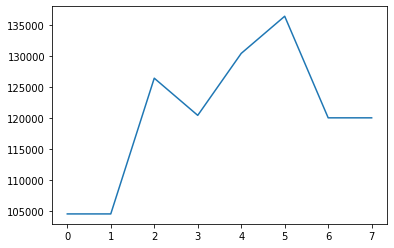

ii)


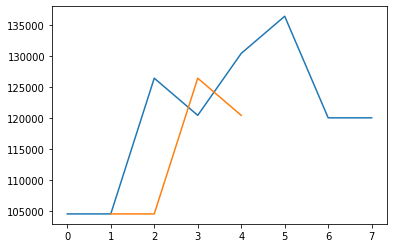

Backlash =  1.0
iii)


TypeError: array() missing required argument 'object' (pos 0)

In [5]:
def smart_z_stack():
    range_first_curve = 8
    sharpness_values_by_z = np.array([[104488, 104488, 126399, 120399, 130399, 136399, 120000, 120000], np.arange(range_first_curve)])
    print("i)")
    plt.plot(sharpness_values_by_z[1], sharpness_values_by_z[0])
    plt.show()

    range_second_curve = 4
    second_shorter_curve_by_z = np.array([[104488, 104488, 126399, 120399], np.arange(range_second_curve) + 1])
    print("ii)")
    plt.plot(sharpness_values_by_z[1], sharpness_values_by_z[0])
    plt.plot(second_shorter_curve_by_z[1], second_shorter_curve_by_z[0])
    plt.show()

    backlash = np.mean(second_shorter_curve_by_z[1] - sharpness_values_by_z[1][:range_second_curve])
    print("Backlash = ", backlash)

    print("iii)")
    focal_point_below_stack_ctr = True
    estimate_focal_point = np.argmax(sharpness_values_by_z[0])

    while(focal_point_below_stack_ctr):
        # move to a position below 
        # TODO
        # collect a stack of 9 images with their sharpness + z-position
        # TODO
        stack_9_img = np.array()
        while(int(stack_9_img.shape[0]/2) > estimate_focal_point):
            estimate_focal_point = np.argmax(stack_9_img[0])
            # if above center of the stack, move up and collect another image
            # TODO
            estimate_focal_point = np.argmax(stack_9_img[0])
        if(int(stack_9_img.shape[0]/2) >= estimate_focal_point):
            focal_point_below_stack_ctr = False

smart_z_stack()

4